In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Rank - Ranking of overall sales

# Name - The games name

# Platform - Platform of the games release (i.e. PC,PS4, etc.)

# Year - Year of the game's release

# Genre - Genre of the game

# Publisher - Publisher of the game

# NA_Sales - Sales in North America (in millions)

# EU_Sales - Sales in Europe (in millions)

# JP_Sales - Sales in Japan (in millions)

# Other_Sales - Sales in the rest of the world (in millions)

# Global_Sales - Total worldwide sales.

df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
df.columns = df.columns.str.lower()
df.head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [113]:
df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [114]:
df['publisher'] = df['publisher'].fillna('Unknown')
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [115]:
# the year is float so to check if there are any floating #
year_check = df[df['year'].notnull()]['year']
cnt = 0
for i in year_check:
    cnt += i%10 - int(i%10)
cnt

0.0

In [116]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16327 non-null  int64  
 1   name          16327 non-null  object 
 2   platform      16327 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16327 non-null  object 
 5   publisher     16327 non-null  object 
 6   na_sales      16327 non-null  float64
 7   eu_sales      16327 non-null  float64
 8   jp_sales      16327 non-null  float64
 9   other_sales   16327 non-null  float64
 10  global_sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [117]:
# steppe 0 to 41 mil.
df['year'] = df['year'].astype(int)
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


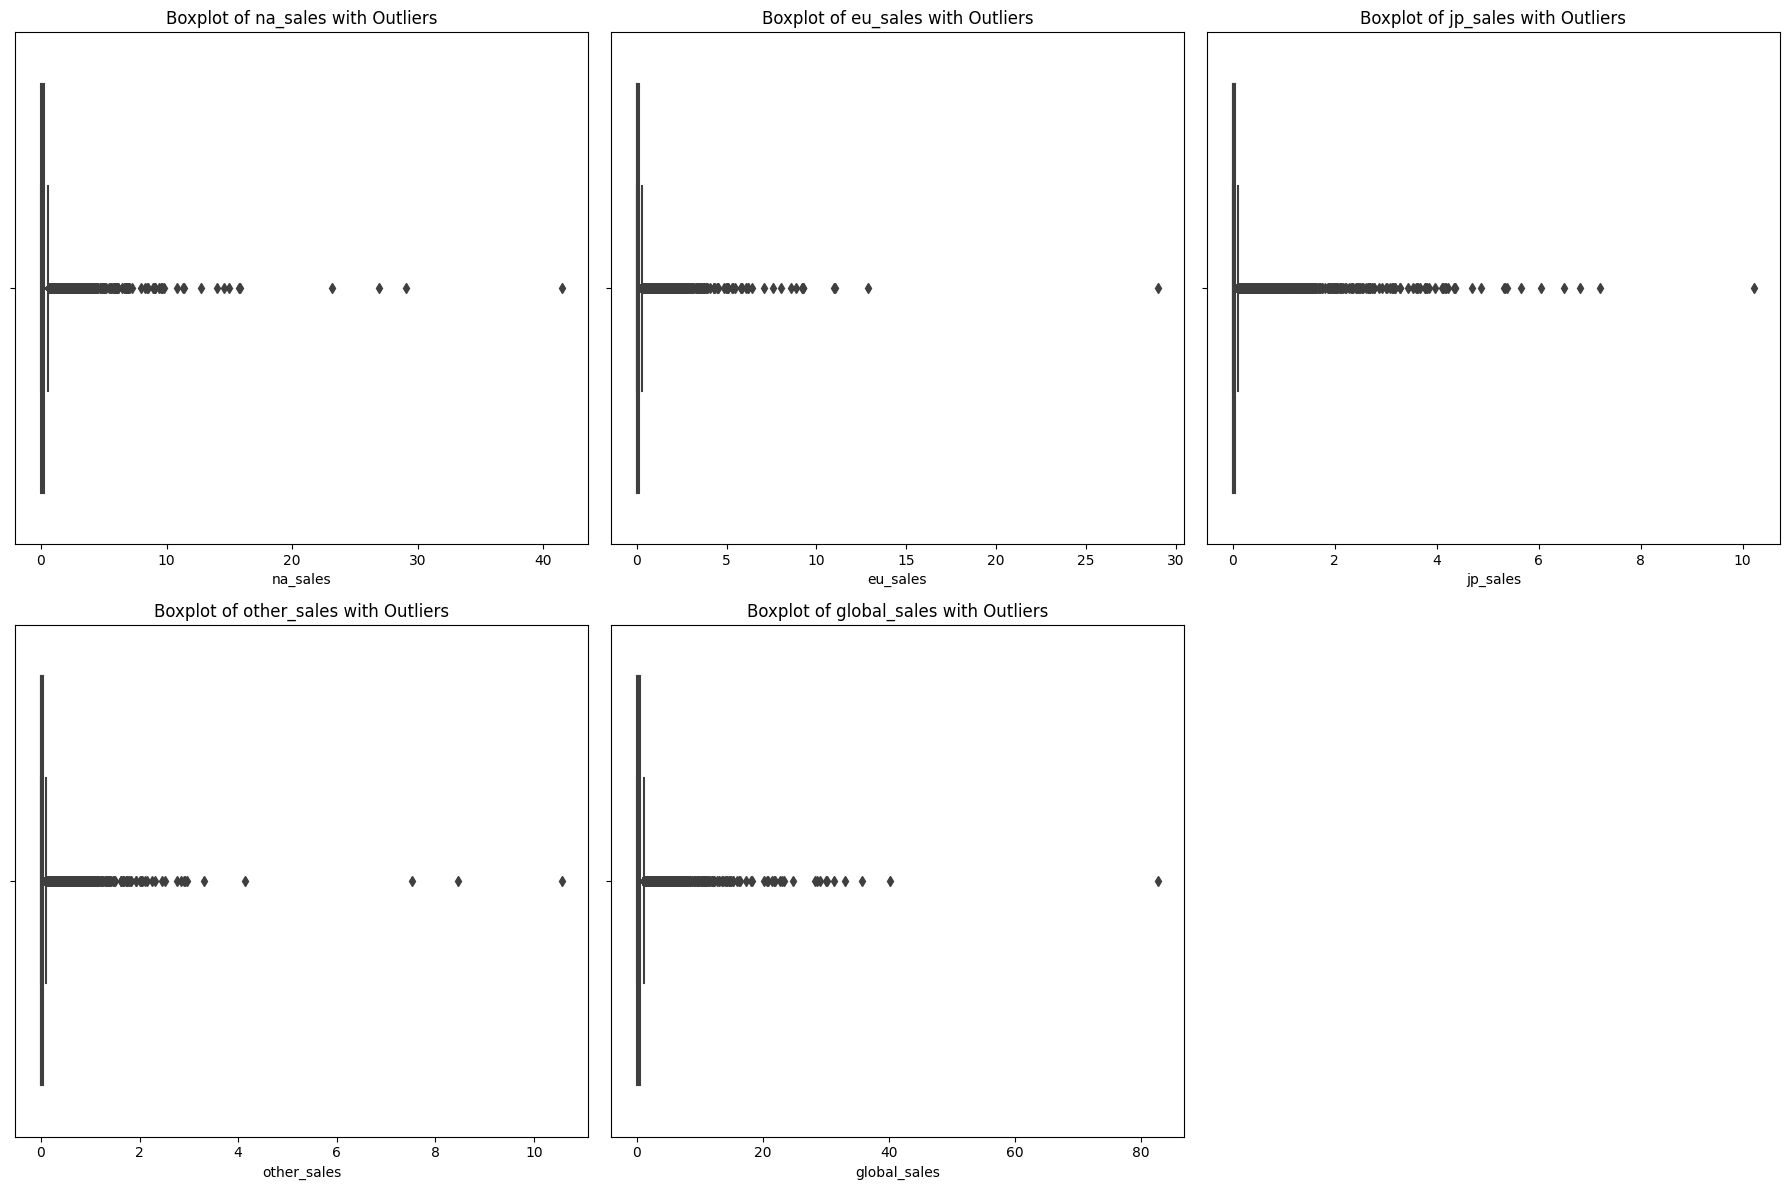

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} with Outliers')
    axes[i].set_xlabel(column)
if 5 < len(axes):
    fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

In [119]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [120]:
df.head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


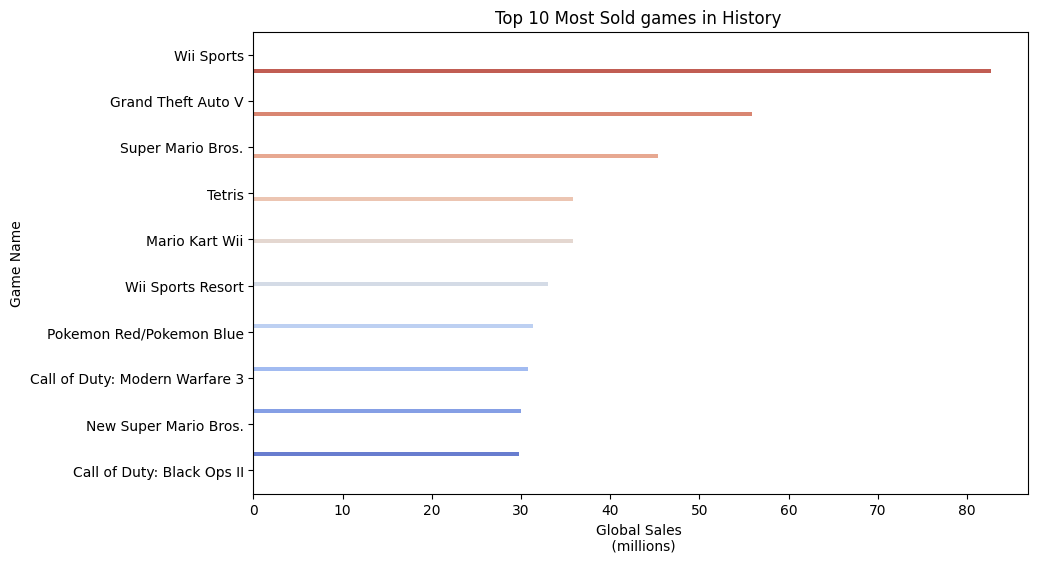

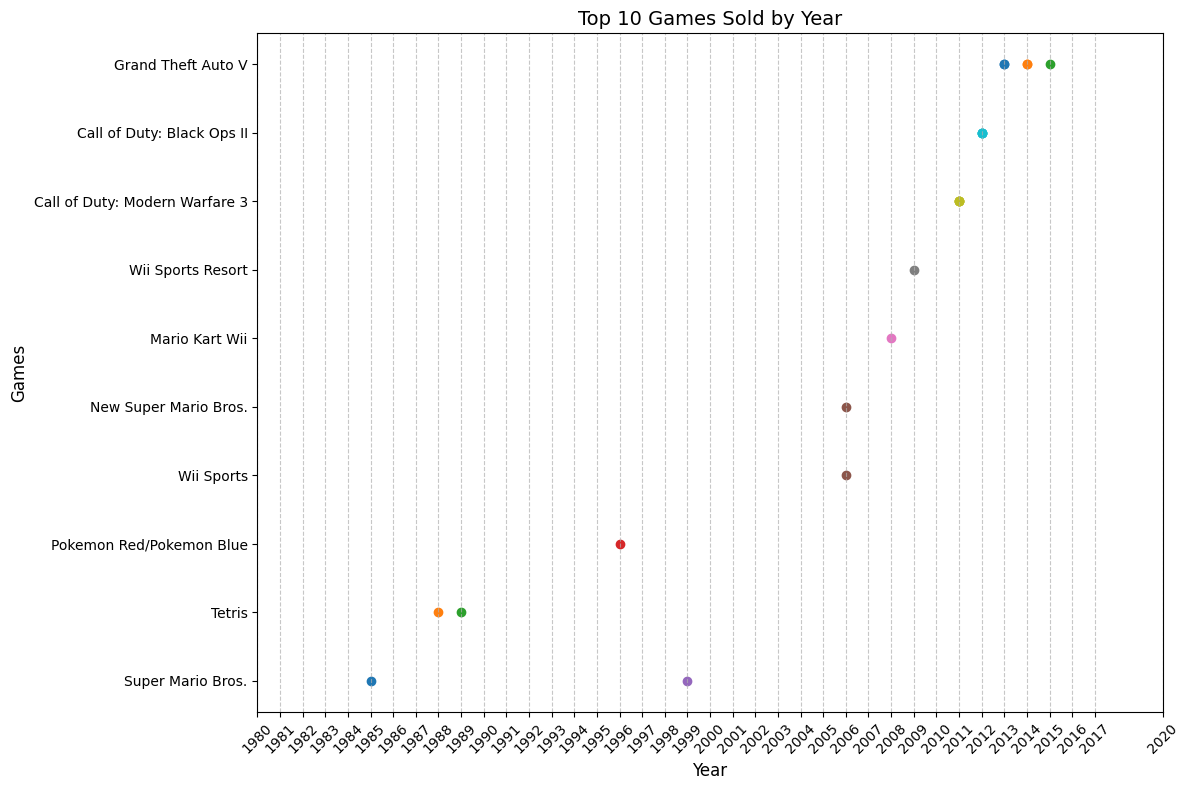

In [121]:
top_sold_games = df.groupby('name')['global_sales'].sum().reset_index().sort_values('global_sales', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='global_sales', y='name', data=top_sold_games, hue='global_sales', palette='coolwarm')
plt.title('Top 10 Most Sold games in History ')
plt.xlabel('Global Sales \n (millions)')
plt.ylabel('Game Name')
plt.legend([],[], frameon=False)
plt.show()

top_sold_games_year = df[df['name'].isin(top_sold_games['name'])][['name', 'year', 'global_sales']]

grouped_data = top_sold_games_year.groupby('year')['name'].apply(list)

# Create the plot
plt.figure(figsize=(12, 8))
for year, games in grouped_data.items():
    plt.scatter([year] * len(games), games, label=str(year))

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Games', fontsize=12)
plt.title('Top 10 Games Sold by Year', fontsize=14)
plt.xticks(sorted(df['year'].unique()), rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [122]:
df.head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


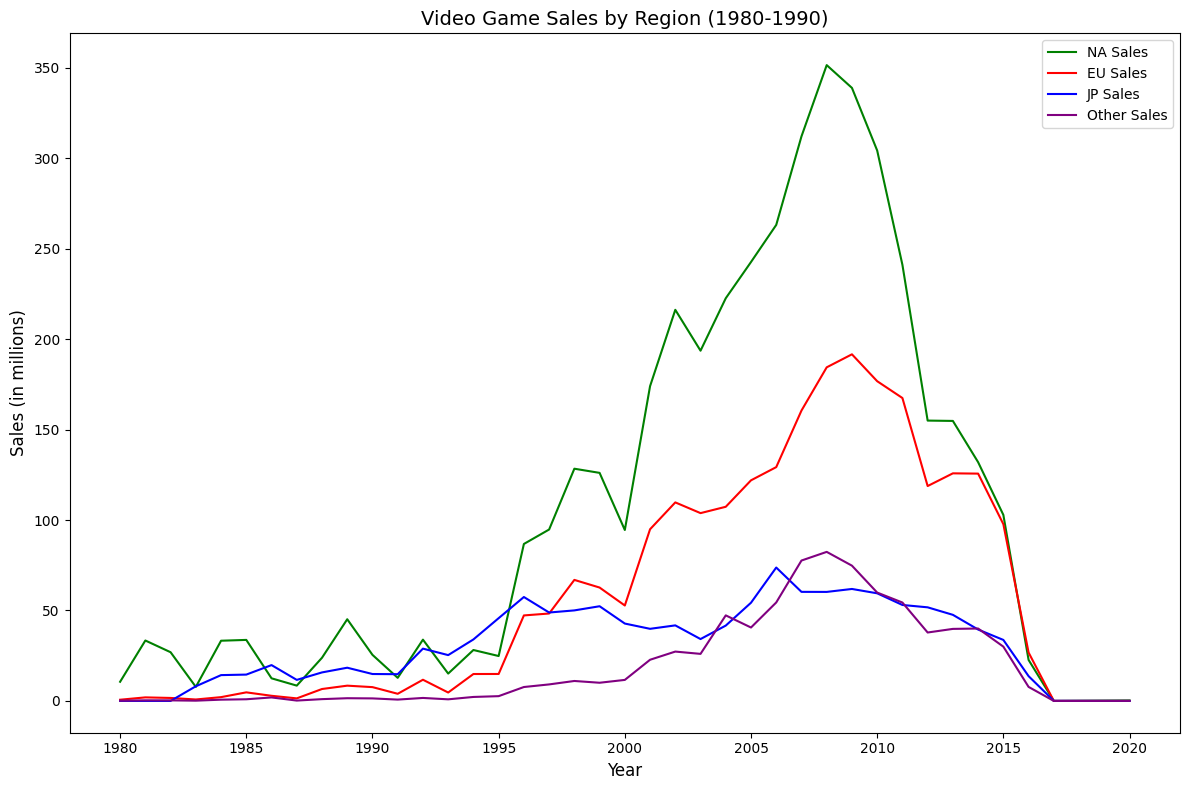

In [123]:
sales_country_year = df.groupby('year')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].sum().reset_index()
plt.figure(figsize=(12, 8))

plt.plot(sales_country_year['year'], sales_country_year['na_sales'], color='green', label='NA Sales')
plt.plot(sales_country_year['year'], sales_country_year['eu_sales'], color='red', label='EU Sales')
plt.plot(sales_country_year['year'], sales_country_year['jp_sales'], color='blue', label='JP Sales')
plt.plot(sales_country_year['year'], sales_country_year['other_sales'], color='purple', label='Other Sales')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.title('Video Game Sales by Region (1980-1990)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [124]:
sum = 0
h = df[df['year']==1980]['na_sales']
for i in h:
    sum += i
sum

10.590000000000003

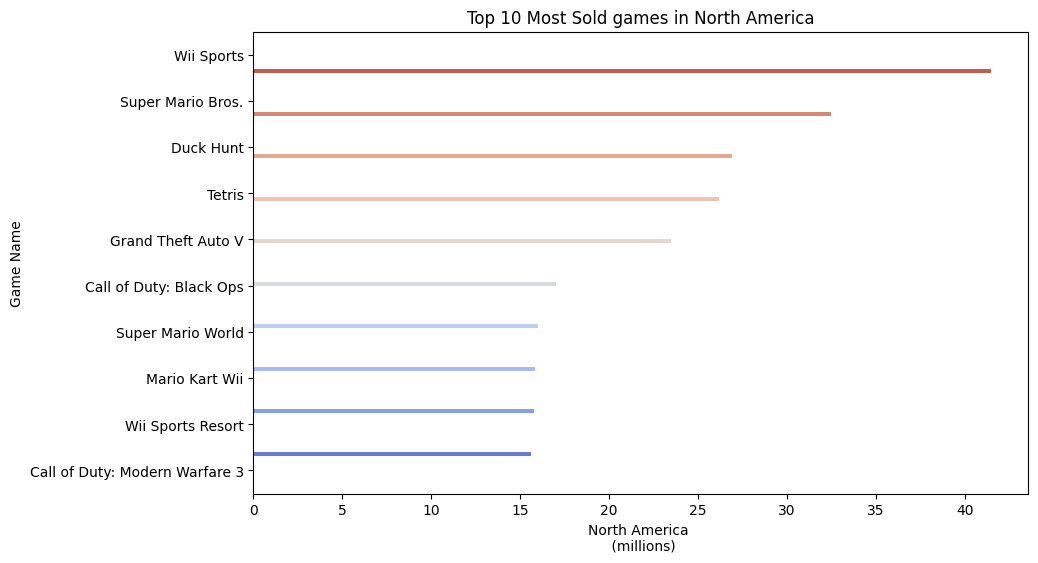

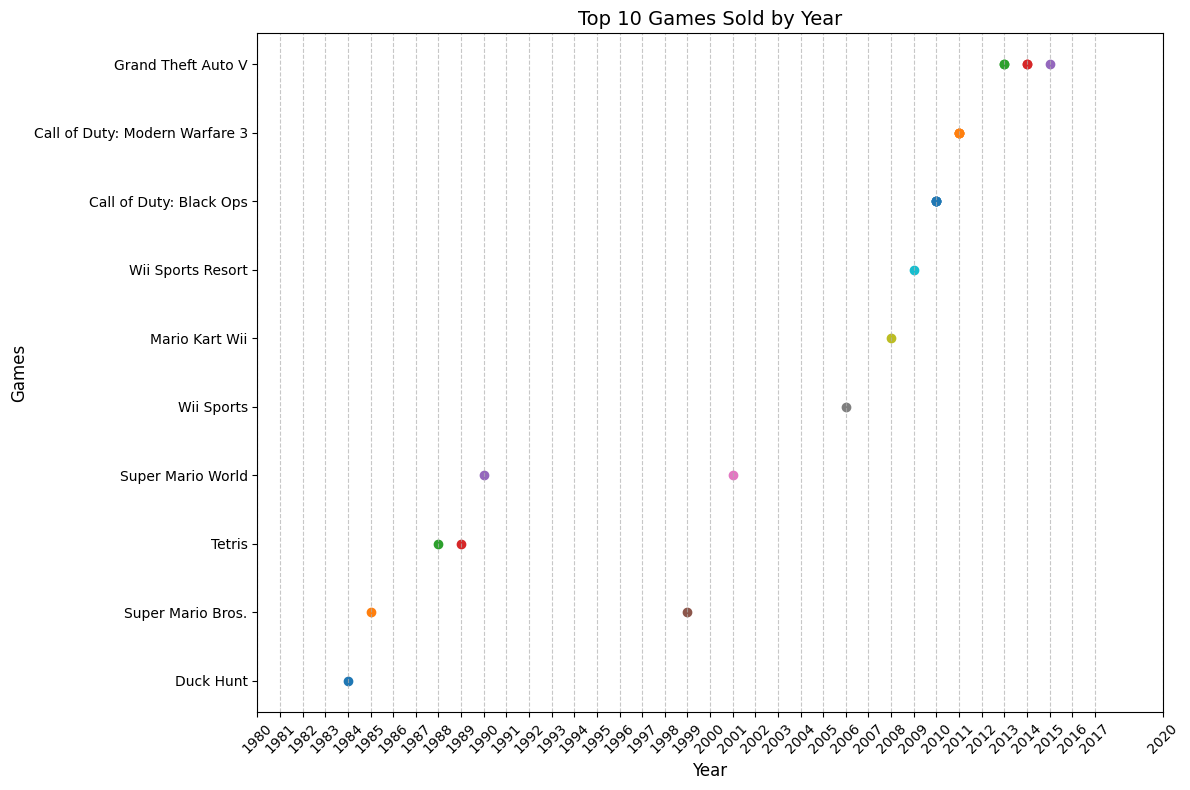

In [131]:
na_sales_top_ten = df.groupby('name')['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='na_sales', y='name', data=na_sales_top_ten, hue='na_sales', palette='coolwarm')
plt.title('Top 10 Most Sold games in North America')
plt.xlabel('North America \n (millions)')
plt.ylabel('Game Name')
plt.legend([],[], frameon=False)
plt.show()

top_sold_games_year_na = df[df['name'].isin(na_sales_top_ten['name'])][['name', 'year', 'na_sales']]

grouped_data = top_sold_games_year_na.groupby('year')['name'].apply(list)

plt.figure(figsize=(12, 8))
for year, games in grouped_data.items():
    plt.scatter([year] * len(games), games, label=str(year))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Games', fontsize=12)
plt.title('Top 10 Games Sold by Year', fontsize=14)
plt.xticks(sorted(df['year'].unique()), rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

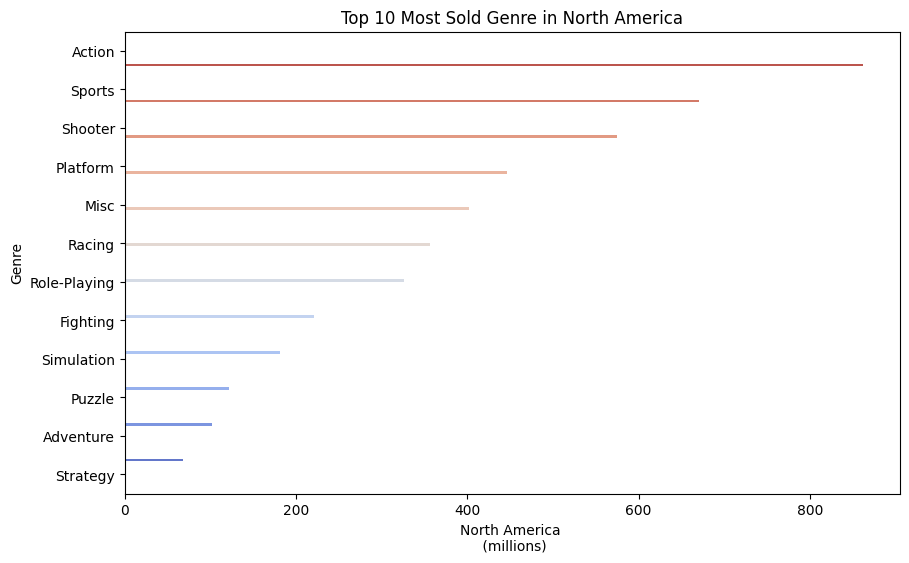

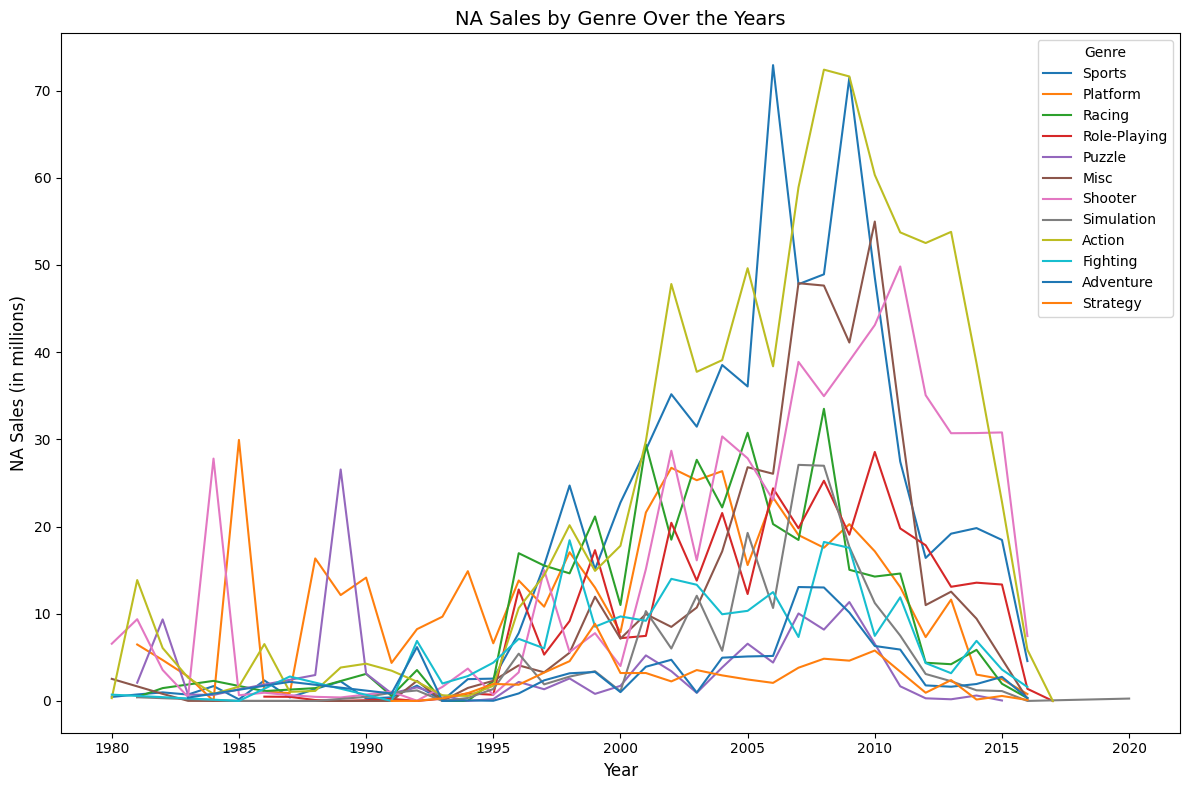

In [163]:
na_most_sold_genre = df.groupby('genre')['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='na_sales', y='genre', data=na_most_sold_genre, hue='na_sales', palette='coolwarm')
plt.title('Top 10 Most Sold Genre in North America')
plt.xlabel('North America \n (millions)')
plt.ylabel('Genre')
plt.legend([],[], frameon=False)
plt.show()

genres = df['genre'].unique()
plt.figure(figsize=(12, 8))
for genre in genres:
    genre_sales = df[df['genre'] == genre].groupby('year')['na_sales'].sum().reset_index()
    plt.plot(genre_sales['year'], genre_sales['na_sales'], label=genre)  # na_sales on x, year on y
plt.ylabel('NA Sales (in millions)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('NA Sales by Genre Over the Years', fontsize=14)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

In [ ]:
na_most_sold_genre = df.groupby('publisher')['global_sales'].sum().reset_index().sort_values('global_sales', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='global_sales', y='publisher', data=na_most_sold_genre, hue='global_sales', palette='coolwarm')
plt.title('Top 10 Most Selling Publishers in World')
plt.xlabel('World \n (millions)')
plt.ylabel('Publisher')
plt.legend([],[], frameon=False)
plt.show()

genres = df['publisher'].unique()
plt.figure(figsize=(12, 8))
for genre in genres:
    genre_sales = df[df['publisher'] == genre].groupby('year')['global_sales'].sum().reset_index()
    plt.plot(genre_sales['year'], genre_sales['global_sales'], label=genre)  # na_sales on x, year on y
plt.ylabel('Sales (in millions)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Sales by Publisher Over the Years', fontsize=14)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()